In [1]:
import numpy as np
import pandas as pd
import glob, os, re
from num2tex import num2tex
import h5py

In [2]:
from pylab import *
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.style.use(['science', 'bright'] )
#plt.style.use(['science', 'bright', 'notebook'] )

#plt.style.use('seaborn-paper')
%matplotlib inline
#sns.set_theme('paper')


In [4]:
import itertools
marker_list = 'osx<>*'

In [5]:
#log_tfname = '/omid/ehsan/active-rods-sims/dt_re/dump-log-tumble_times-phi{phi}-t_re{t_re}-rt{rt}-alpha{alpha}-G{Gmode}-phimax{phimax}-*.tsv'
log_tfname0 = 'gwdg/log-tumble/dump-v3-2D-Na100-No2500-Ro5-phi{phi}-T0-dt1e-2-t_re5e-1-tgsd2e1-G{Gmode}-alpha1e2-phimax0.91-phi00.63-BG{BG}-TMrandom-id{idx}log-tumble.tsv'
log_tfname = 'gwdg/log-tumble/dump-v4-2D-Na100-No2500-Ro5-phi{phi}-T0-dt1e-2-t_re5e-1-tgsd2e1-G{Gmode}-alpha1e2-phimax0.91-phi00.63-BG{BG}-TMrandom-id{idx}log-tumble.hdf'

## Plot
### histograms

In [6]:
#alpha = '10'
#Gmode = 'uniform'
#Gmode = 'exp'
Gmode = 'sigmoid'
phi = '0.4'
BG = '0.1'
idx = '6'
dt = 1e-2
#rt = '1e2'
#t_re = '5e-2'
#phimax = '0.9069'
#dt = 1e-4
fname = log_tfname.format(phi=phi, Gmode=Gmode, BG=BG, idx=idx)
#fname = '/omid/ehsan/active-rods-sims/gsds/dump-log-tumble_times-phi0.6-t_re5e-2-rt1e2-alpha10-Glinear-phimax0.70-id1log-tumble.tsv'
#tdf = pd.read_csv(fname, delim_whitespace=True, index_col=0)*dt
tdf = pd.read_hdf(fname, 'log_tumble')*dt
dtdf = tdf.diff(axis=0).loc[2:]

In [47]:
dtdf
pool = dtdf.values[~np.isnan(dtdf.values)]

In [48]:
pool.shape

(8005508,)

In [49]:
dtdf

p0    p1    p2    p3   p4    p5    p6   p7   p8    p9  ...   p90  \
2      6.5  13.5   3.0  15.0  4.5   2.0   2.0  0.5  1.0   6.5  ...   0.5   
3      5.0  10.0  10.5   2.0  5.5   1.0   0.5  5.0  2.5   0.5  ...  21.5   
4      3.5  11.5   0.5   3.0  1.5   5.0  15.0  8.5  1.5   6.0  ...   1.0   
5      5.5   7.0   3.0   7.0  4.5  10.0   1.5  0.5  9.0  12.5  ...   6.0   
6      2.5  12.0   1.0   3.0  4.0   0.5   0.5  0.5  8.0  18.5  ...   3.0   
...    ...   ...   ...   ...  ...   ...   ...  ...  ...   ...  ...   ...   
80650  NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN  ...   NaN   
80651  NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN  ...   NaN   
80652  NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN  ...   NaN   
80653  NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN  ...   NaN   
80654  NaN   NaN   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN  ...   NaN   

        p91  p92  p93  p94  p95  p96  p97  p98   p99  
2       3.0  1.0  6.5  4.5  4.5  4.0  2.0  2.0   3.0  
3      14.5  3.5  7.0  2.5  3.0  7.5  3.5  0.5   3.5  
4       0.5  4.5  3.0  0.5  6.5  9.5  1.5  0.5   6.5  
5       6.5  1.0  5.0  2.0  1.5  4.5  1.0  4.0  10.0  
6       0.5  1.0  1.0  2.5  9.5  0.5  5.5  1.0   1.5  
...     ...  ...  ...  ...  ...  ...  ...  ...   ...  
80650   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
80651   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
80652   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
80653   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
80654   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[80653 rows x 100 columns]

In [50]:
pool.mean()

4.996435766474782

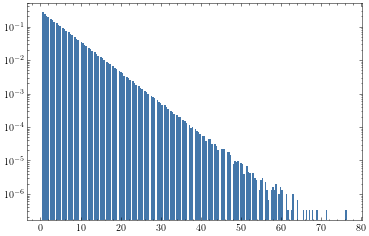

In [51]:
bins = np.logspace(np.log10(pool.min()), np.log10(pool.max()), 200)
bins=200
hist(pool, density=True, bins=bins)
#xscale('log')
yscale('log')

In [7]:
mean_delta_tre_d = dict()

In [8]:
mean_delta_tre_d['sigmoid'] = copy(mean_delta_tre)

NameError: name 'mean_delta_tre' is not defined

In [8]:
y = dict()
b = dict()
bc = dict()

# P(tumble_time) for diff phi

10
30
10
50
10


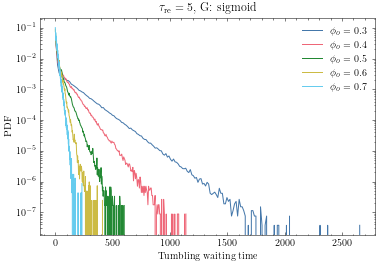

In [9]:
save = True
save = False
Gmode = 'uniform'
Gmode = 'sigmoid'
dt = 1e-2
BG  = '0.1'
t_re = '5e-1'
re_pattern = '(?<=phi).*(?=-T0)'
flist = glob.glob(log_tfname.format(phi='*', Gmode=Gmode, idx='2', BG=BG))
flist.sort(key = lambda x: float(re.findall(re_pattern, x)[0]))
fig = plt.figure()
#bins = np.arange(0, 300, 2)
bins = 200
#bins = np.linspace(1, 1000)
mean_delta_tre = list()
for f0 in flist[:]:
    phi = re.findall(re_pattern, f0)[0]
    label = '$\phi_o = %s$'%phi
    # diff sims
    flist2 = glob.glob(log_tfname.format(phi=phi, Gmode=Gmode, idx='*', BG=BG))
    pool = []
    print(len(flist2))
    #print(flist2)
    for f1 in flist2[:5]:
        tdf = pd.read_hdf(f1, 'log_tumble')*dt
        dtdf = tdf.diff(axis=0).loc[3:4000]
        del tdf
        pool = pool + dtdf.values[~np.isnan(dtdf.values)].tolist()
        del dtdf
        #print(len(pool))
    # histogram
    pool = np.array(pool)
    mean_delta_tre.append([float(phi), pool.mean()])
    y[phi], b[phi] = np.histogram(pool, bins=bins, density=True)
    del pool
    bc[phi] = 0.5*(b[phi][1:]+b[phi][:-1])
    plot(bc[phi], y[phi], '-', label=label)
    #hist(pool, bins=bins, density=True, label=label, alpha=0.8)
mean_delta_tre_d[Gmode] = np.array(mean_delta_tre)
legend(loc='best')
#xscale('log')
yscale('log')
#xlabel('$\Delta t_{\mathrm{re}}$')
xlabel('Tumbling waiting time')
ylabel('PDF')
title('$\\tau_\mathrm{re}=%s$'%'{:g}'.format(num2tex(float(t_re)/float(BG))) + ', G: %s'%Gmode)
if save:
    fname = 'plots/hist-v4-dt_re-t_re{t_re}-BG{BG}-Gmode{Gmode}-diff-phi'.format(t_re=t_re, Gmode=Gmode, BG=BG)
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

In [10]:
%matplotlib inline

In [15]:
%qtconsole

In [11]:
from scipy.optimize import curve_fit

In [12]:
import matplotlib

0.3 (array([ 0.00374467, -0.0064813 ]), array([[ 1.01165790e-07, -3.31460877e-08],
       [-3.31460877e-08,  1.09500291e-08]]))
0.4 (array([ 0.00642863, -0.01207269]), array([[ 4.08627252e-07, -1.77463846e-07],
       [-1.77463846e-07,  7.79226632e-08]]))
0.5 (array([ 0.00889982, -0.02194571]), array([[ 4.73707960e-07, -2.79960659e-07],
       [-2.79960659e-07,  1.67364680e-07]]))
0.6 (array([ 0.02767038, -0.04309066]), array([[ 3.98492051e-05, -1.13922728e-05],
       [-1.13922728e-05,  3.28252314e-06]]))
0.7 (array([ 0.05180027, -0.06651853]), array([[ 3.47909120e-04, -9.24976416e-05],
       [-9.24976416e-05,  2.48249965e-05]]))


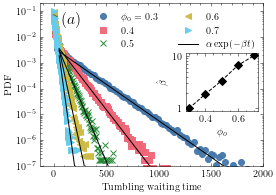

In [14]:
save = True
save = False
Gmode = 'uniform'
Gmode = 'sigmoid'
dt = 1e-2
fig = plt.figure(figsize=(4, 3))
#bins = np.arange(0, 300, 2)
exp_fit = [[]]
phi_list = ['0.3', '0.4', '0.5', '0.6', '0.7']
m = itertools.cycle(marker_list)
for phi in phi_list:
    if phi=='0.3':
        label = '$\phi_{\mathrm{o}} = %s$'%phi
    else:
        label = '$%s$'%phi
    
    #label = '$\phi_o = %s$'%phi
    plot(bc[phi][::2], y[phi][::2], '%s'%next(m), label=label, alpha=0.95)
m = itertools.cycle(marker_list)
for phi in phi_list:
    #plot(bc[phi][::2], y[phi][::2], '%s'%next(m), label=label, alpha=0.95)
    x0 = bc[phi][-145:-110]
    y0 = y[phi][-145:-110]
    fit_data = curve_fit(lambda t, a, b: a*np.exp(b*t), x0, y0, p0=(1, -0.01))
    print(phi, fit_data)
    x00 = np.linspace(50, bc[phi][-1],100)
    if phi==phi_list[-1]:
        plot(x00, fit_data[0][0]*np.exp(fit_data[0][1]*x00), color='black', ls='-', lw=1,
            label='$\\alpha \exp(-\\beta t)$')
    else:
        plot(x00, fit_data[0][0]*np.exp(fit_data[0][1]*x00), color='black', ls='-', lw=1)
    exp_fit = exp_fit + [[float(phi), fit_data[0][0], fit_data[0][1]]]
exp_fit = np.array(exp_fit[1:])
#>>> scipy.optimize.curve_fit(lambda t,a,b: a*numpy.exp(b*t),  x,  y,  p0=(4, 0.1))
legend(loc='upper right', frameon=False, ncol=2)
tau = 15
x = np.linspace(0, 200, 100)
#plot(x, np.exp(-x/tau), color='black', ls='--' )
#xscale('log')
yscale('log')
xlim(None, 2e3)
ylim(1e-7, 2e-1)
#xlabel('$\Delta t_{\mathrm{re}}$')
xlabel('Tumbling waiting time')
ylabel('PDF')
plt.text(  # position text relative to Axes
    .1, .95, '$(a)$', fontsize=16,
    ha='left', va='top',
    transform=gca().transAxes)
#text(250, , '$(a)$')
###############
ax3 = fig.add_axes([0.63, 0.38, 0.25, 0.27])
ax3.plot(exp_fit[:,0], exp_fit[:, 2]/exp_fit[0, 2], '--D', color='black')
ax3.set_xlabel('$\phi_o$')
ax3.set_ylabel('$\\hat{\\beta}$')
#xscale('log')
ax3.set_yscale('log')
#ax3.set_yticklabels([1, 10], ['1', '10'])
ax3.set_yticks([1, 10])
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax3.get_yaxis().get_major_formatter().labelOnlyBase = False

#plt.show()
#title('$\\tau_\mathrm{re}=%s$'%'{:g}'.format(num2tex(float(t_re)/float(BG))) + ', G: %s'%Gmode)
if save:
    fname = 'plots/hist-v4-semilog-dt_re-t_re{t_re}-BG{BG}-Gmode{Gmode}-diff-phi-fit-inset-v1'.format(t_re=t_re, Gmode=Gmode, BG=BG)
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

0.3 (array([ 0.00374467, -0.0064813 ]), array([[ 1.01165790e-07, -3.31460877e-08],
       [-3.31460877e-08,  1.09500291e-08]]))
0.4 (array([ 0.00642863, -0.01207269]), array([[ 4.08627252e-07, -1.77463846e-07],
       [-1.77463846e-07,  7.79226632e-08]]))
0.5 (array([ 0.00889982, -0.02194571]), array([[ 4.73707960e-07, -2.79960659e-07],
       [-2.79960659e-07,  1.67364680e-07]]))
0.6 (array([ 0.02767038, -0.04309066]), array([[ 3.98492051e-05, -1.13922728e-05],
       [-1.13922728e-05,  3.28252314e-06]]))
0.7 (array([ 0.05180027, -0.06651853]), array([[ 3.47909120e-04, -9.24976416e-05],
       [-9.24976416e-05,  2.48249965e-05]]))


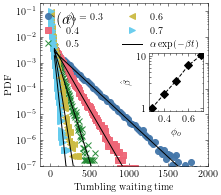

In [13]:
save = True
save = False
Gmode = 'uniform'
Gmode = 'sigmoid'
dt = 1e-2
fig = plt.figure(figsize=(3, 3))
#bins = np.arange(0, 300, 2)
exp_fit = [[]]
phi_list = ['0.3', '0.4', '0.5', '0.6', '0.7']
m = itertools.cycle(marker_list)
for phi in phi_list:
    if phi=='0.3':
        label = '$\phi_{\mathrm{o}} = %s$'%phi
    else:
        label = '$%s$'%phi
    
    #label = '$\phi_o = %s$'%phi
    plot(bc[phi][::2], y[phi][::2], '%s'%next(m), label=label, alpha=0.95)
m = itertools.cycle(marker_list)
for phi in phi_list:
    #plot(bc[phi][::2], y[phi][::2], '%s'%next(m), label=label, alpha=0.95)
    x0 = bc[phi][-145:-110]
    y0 = y[phi][-145:-110]
    fit_data = curve_fit(lambda t, a, b: a*np.exp(b*t), x0, y0, p0=(1, -0.01))
    print(phi, fit_data)
    x00 = np.linspace(50, bc[phi][-1],100)
    if phi==phi_list[-1]:
        plot(x00, fit_data[0][0]*np.exp(fit_data[0][1]*x00), color='black', ls='-', lw=1,
            label='$\\alpha \exp(-\\beta t)$')
    else:
        plot(x00, fit_data[0][0]*np.exp(fit_data[0][1]*x00), color='black', ls='-', lw=1)
    exp_fit = exp_fit + [[float(phi), fit_data[0][0], fit_data[0][1]]]
exp_fit = np.array(exp_fit[1:])
#>>> scipy.optimize.curve_fit(lambda t,a,b: a*numpy.exp(b*t),  x,  y,  p0=(4, 0.1))
legend(loc='upper right', frameon=False, ncol=2)
tau = 15
x = np.linspace(0, 200, 100)
#plot(x, np.exp(-x/tau), color='black', ls='--' )
#xscale('log')
yscale('log')
xlim(None, 2e3)
ylim(1e-7, 2e-1)
#xlabel('$\Delta t_{\mathrm{re}}$')
xlabel('Tumbling waiting time')
ylabel('PDF')
plt.text(  # position text relative to Axes
    .1, .95, '$(a)$', fontsize=16,
    ha='left', va='top',
    transform=gca().transAxes)
#text(250, , '$(a)$')
###############
ax3 = fig.add_axes([0.63, 0.38, 0.25, 0.27])
ax3.plot(exp_fit[:,0], exp_fit[:, 2]/exp_fit[0, 2], '--D', color='black')
ax3.set_xlabel('$\phi_o$')
ax3.set_ylabel('$\\hat{\\beta}$')
#xscale('log')
ax3.set_yscale('log')
#ax3.set_yticklabels([1, 10], ['1', '10'])
ax3.set_yticks([1, 10])
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax3.get_yaxis().get_major_formatter().labelOnlyBase = False

#plt.show()
#title('$\\tau_\mathrm{re}=%s$'%'{:g}'.format(num2tex(float(t_re)/float(BG))) + ', G: %s'%Gmode)
if save:
    fname = 'plots/hist-v4-semilog-dt_re-t_re{t_re}-BG{BG}-Gmode{Gmode}-diff-phi-fit-inset-v2'.format(t_re=t_re, Gmode=Gmode, BG=BG)
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

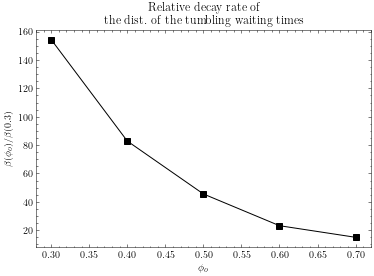

In [15]:
#save = True
save = False
fig = figure()
plot(exp_fit[:,0], -exp_fit[:, 2]**-1/(exp_fit[0, 2]**0), '-s', color='black')
xlabel('$\phi_o$')
ylabel('$\\beta(\phi_o)/\\beta(0.3)$')
#xscale('log')
#yscale('log')
title('Relative decay rate of \n the dist. of the tumbling waiting times')
if save:
    fname = 'plots/decay-rate-dist-dt_re-t_re{t_re}-BG{BG}-Gmode{Gmode}-diff-phi-fit'.format(t_re=t_re, Gmode=Gmode, BG=BG)
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

[[0.3, 91.07334310650825], [0.4, 47.91996723361681], [0.5, 25.64705252626313], [0.6, 17.972283141570784], [0.7, 13.4165967983992]]


KeyError: 'uniform'

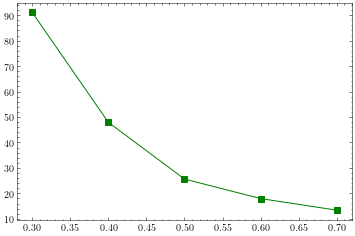

In [ ]:
save = False
#save = True
Gmode = 'sigmoid'
f = figure()
print(mean_delta_tre)
plot(mean_delta_tre_d['sigmoid'][:, 0], mean_delta_tre_d['sigmoid'][:, 1], '-s', color='green', label='G: sigmoid')
plot(mean_delta_tre_d['uniform'][:, 0], mean_delta_tre_d['uniform'][:, 1], '--o', color='red', label='G: uniform')
legend(loc='best')
#yscale('log')
title('$\\tau_{\mathrm{re}} = 5$')
ylabel('$\\langle \\tau_{\mathrm{re}}^{w}\\rangle$')#/ \\tau_{\mathrm{re}}$')
xlabel('$\phi_o$')
if save:
    fname = 'plots/mean-tumble-waitingtime-v4-t_re5-Gmode{Gmode}-diff-phi'.format(Gmode=Gmode)
    f.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    f.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

In [33]:
mean_delta_tre_d

{'sigmoid': array([[ 0.3       , 91.07334311],
        [ 0.4       , 47.91996723],
        [ 0.5       , 25.64705253],
        [ 0.6       , 17.97228314],
        [ 0.7       , 13.4165968 ]])}

[[0.3, 91.07334310650825], [0.4, 47.91996723361681], [0.5, 25.64705252626313], [0.6, 17.972283141570784], [0.7, 13.4165967983992]]


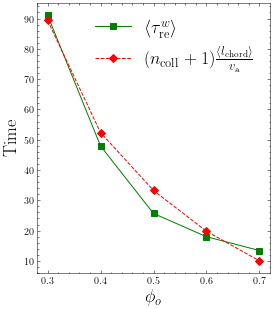

In [31]:
save = False
save = True
######################
chord_length_means = np.array([[ 0.3       , 16.24150605],
       [ 0.4       , 10.94098857],
       [ 0.5       ,  7.37385662],
       [ 0.6       ,  5.11236047],
       [ 0.7       ,  3.16464025]])
mean_ncolls = np.array([[0.3       , 4.50276885],
       [0.4       , 3.78459922],
       [0.5       , 3.5080391 ],
       [0.6       , 2.86779283],
       [0.7       , 2.16451506]])
#############

Gmode = 'sigmoid'
f = figure(figsize=(4., 4.5))
print(mean_delta_tre)
plot(mean_delta_tre_d['sigmoid'][:, 0], mean_delta_tre_d['sigmoid'][:, 1], '-s', color='green',
     label='$\\langle \\tau_{\mathrm{re}}^{w}\\rangle$') #label='G: sigmoid')
tau2 = (mean_ncolls[:, 1] + 1)*chord_length_means[:, 1]
label2 = '$(n_{\mathrm{coll}} + 1)\\frac{\\langle l_{\mathrm{chord}}\\rangle}{v_{\mathrm{a}}}$'
plot(mean_ncolls[:, 0], tau2, '--D', color='red', label=label2)
#plot(mean_delta_tre_d['uniform'][:, 0], mean_delta_tre_d['uniform'][:, 1], '--o', color='red', label='G: uniform')
legend(loc='best', fontsize=18)
#yscale('log')
#title('$\\tau_{\mathrm{re}} = 5$', fontsize=18)
#ylabel('$\\langle \\tau_{\mathrm{re}}^{w}\\rangle$')#/ \\tau_{\mathrm{re}}$')
xlabel('$\phi_o$', fontsize=18)
ylabel('Time', fontsize=18)
xticks(mean_ncolls[:, 0])
tight_layout()
if save:
    fname = 'plots/4slides/mean-tumble-waitingtime-vs-ncolls-lchord-v4-t_re5-Gmode{Gmode}-diff-phi'.format(Gmode=Gmode)
    f.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    f.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

In [12]:
mean_delta_tre_d

{'uniform': array([[0.3       , 5.00280965],
        [0.4       , 4.99634292],
        [0.5       , 4.99386443],
        [0.6       , 5.00203602],
        [0.7       , 5.00268959]])}

In [37]:
bc_tre = bc

In [44]:
import pickle

In [46]:
f = open('tre_waiting_dist.pkl', 'wb')
pickle.dump(bc, f)
f.close()

0.3 (array([ 0.00374467, -0.0064813 ]), array([[ 1.01165790e-07, -3.31460877e-08],
       [-3.31460877e-08,  1.09500291e-08]]))
0.4 (array([ 0.00642863, -0.01207269]), array([[ 4.08627252e-07, -1.77463846e-07],
       [-1.77463846e-07,  7.79226632e-08]]))
0.5 (array([ 0.00889982, -0.02194571]), array([[ 4.73707960e-07, -2.79960659e-07],
       [-2.79960659e-07,  1.67364680e-07]]))
0.6 (array([ 0.02767038, -0.04309066]), array([[ 3.98492051e-05, -1.13922728e-05],
       [-1.13922728e-05,  3.28252314e-06]]))
0.7 (array([ 0.05180027, -0.06651853]), array([[ 3.47909120e-04, -9.24976416e-05],
       [-9.24976416e-05,  2.48249965e-05]]))


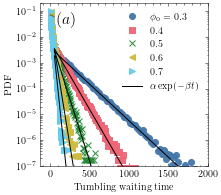

In [47]:
save = True
#save = False
inset = False
Gmode = 'uniform'
Gmode = 'sigmoid'
dt = 1e-2
fig = plt.figure(figsize=(3, 3))
#bins = np.arange(0, 300, 2)
exp_fit = [[]]
phi_list = ['0.3', '0.4', '0.5', '0.6', '0.7']
m = itertools.cycle(marker_list)
for phi in phi_list:
    if phi=='0.3':
        label = '$\phi_{\mathrm{o}} = %s$'%phi
    else:
        label = '$%s$'%phi
    
    #label = '$\phi_o = %s$'%phi
    plot(bc[phi][::2], y[phi][::2], '%s'%next(m), label=label, alpha=0.95)
m = itertools.cycle(marker_list)
for phi in phi_list:
    #plot(bc[phi][::2], y[phi][::2], '%s'%next(m), label=label, alpha=0.95)
    x0 = bc[phi][-145:-110]
    y0 = y[phi][-145:-110]
    fit_data = curve_fit(lambda t, a, b: a*np.exp(b*t), x0, y0, p0=(1, -0.01))
    print(phi, fit_data)
    x00 = np.linspace(50, bc[phi][-1],100)
    if phi==phi_list[-1]:
        plot(x00, fit_data[0][0]*np.exp(fit_data[0][1]*x00), color='black', ls='-', lw=1,
            label='$\\alpha \exp(-\\beta t)$')
    else:
        plot(x00, fit_data[0][0]*np.exp(fit_data[0][1]*x00), color='black', ls='-', lw=1)
    exp_fit = exp_fit + [[float(phi), fit_data[0][0], fit_data[0][1]]]
exp_fit = np.array(exp_fit[1:])
#>>> scipy.optimize.curve_fit(lambda t,a,b: a*numpy.exp(b*t),  x,  y,  p0=(4, 0.1))
legend(loc='upper right', frameon=False, ncol=1)
tau = 15
x = np.linspace(0, 200, 100)
#plot(x, np.exp(-x/tau), color='black', ls='--' )
#xscale('log')
yscale('log')
xlim(None, 2e3)
ylim(1e-7, 2e-1)
#xlabel('$\Delta t_{\mathrm{re}}$')
xlabel('Tumbling waiting time')
ylabel('PDF')
plt.text(  # position text relative to Axes
    .1, .95, '$(a)$', fontsize=16,
    ha='left', va='top',
    transform=gca().transAxes)
#text(250, , '$(a)$')
###############
if inset:
    ax3 = fig.add_axes([0.63, 0.38, 0.25, 0.27])
    ax3.plot(exp_fit[:,0], exp_fit[:, 2]/exp_fit[0, 2], '--D', color='black')
    ax3.set_xlabel('$\phi_o$')
    ax3.set_ylabel('$\\hat{\\beta}$')
    #xscale('log')
    ax3.set_yscale('log')
    #ax3.set_yticklabels([1, 10], ['1', '10'])
    ax3.set_yticks([1, 10])
    ax3.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax3.get_yaxis().get_major_formatter().labelOnlyBase = False

#plt.show()
#title('$\\tau_\mathrm{re}=%s$'%'{:g}'.format(num2tex(float(t_re)/float(BG))) + ', G: %s'%Gmode)
if save:
    fname = 'plots/hist-v4-semilog-dt_re-t_re{t_re}-BG{BG}-Gmode{Gmode}-diff-phi-fit-inset-v2'.format(t_re=t_re, Gmode=Gmode, BG=BG)
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

# P(tumble_time) for diff phi and diff. $\alpha$

In [63]:
%qtconsole

30
30


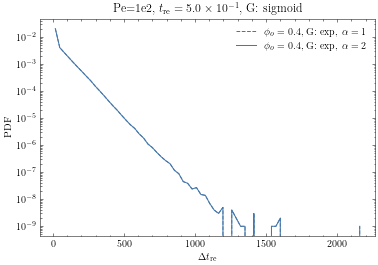

In [85]:
save = True
save = False
#Gmode = 'uniform'
Gmode = 'sigmoid'
t_re = '5e-1'
BG = '0.1'
dt = 1e-2

re_pattern = '(?<=phi).*(?=-T0)'
flist = glob.glob(log_tfname.format(phi='*', BG=BG, Gmode=Gmode, idx='1'))
flist.sort(key = lambda x: float(re.findall(re_pattern, x)[0]))
fig = plt.figure()
bins = 70
for i, f0 in enumerate(flist[:]):
    phi = re.findall(re_pattern, f0)[0]
    for alpha in ['1', '2']:
        label = r'$\phi_o = %s$'%phi + r', G: exp, '+r'$\alpha=%s$'%alpha
        # diff sims
        flist2 = glob.glob(log_tfname.format(phi=phi, Gmode=Gmode, BG=BG, idx='*'))
        pool = []
        print(len(flist2))
        #print(flist2)
        for f1 in flist2:
            tdf = pd.read_csv(f1, delim_whitespace=True, index_col=0)*dt
            dtdf = tdf.diff(axis=0).loc[2:]
            pool = pool + (dtdf.values[~np.isnan(dtdf.values)].tolist())
            #print(len(pool))
        # histogram
        pool = np.array(pool)
        y, b = np.histogram(pool, bins=bins, density=True)
        bc = 0.5*(b[1:]+b[:-1])
        plot(bc, y, '-'+'-'*(alpha=='1'), label=label, color='C%d'%i)
    #hist(pool, bins=bins, density=True, label=label, alpha=0.8)
legend(loc='best')
#xscale('log')
yscale('log')
xlabel('$\Delta t_{\mathrm{re}}$')
ylabel('PDF')
title('Pe=1e2, $t_\mathrm{re}=%s$'%'{:.1e}'.format(num2tex(float(t_re))) + ', G: %s'%Gmode)
if save:
    fname = 'plots/hist-dt_re-Pe1e2-t_re{t_re}-Gmode{Gmode}-phimax{phimax}-diff-phi-diff-alpha'.format(t_re=t_re, Gmode=Gmode, alpha=alpha, phimax=phimax)
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

# P(tumble_time) for diff phi and diff. Gmode

301
100
401
100
401
100


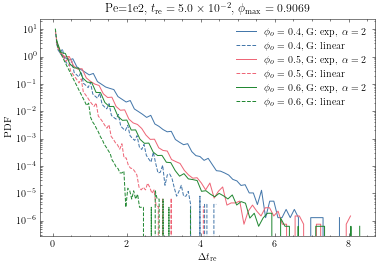

In [175]:
save = True
#save = False
alpha = '2'
Gmode = 'linear'
#Gmode = 'exp'
rt = '1e2'
t_re = '5e-2'
phimax = '0.75'
phimax = '0.9069'
dt = 1e-4
re_pattern = '(?<=phi).*(?=-t_re)'
flist = glob.glob(log_tfname.format(phi='*', rt=rt, Gmode=Gmode, t_re=t_re, alpha=alpha, phimax=phimax+'*id1l*'))
flist.sort(key = lambda x: float(re.findall(re_pattern, x)[0]))
fig = plt.figure()
bins = 70
for i, f0 in enumerate(flist[:]):
    phi = re.findall(re_pattern, f0)[0]
    for Gmode in ['exp', 'linear']:
        if Gmode=='exp':
            label = r'$\phi_o = %s$'%phi + r', G: exp, '+r'$\alpha=%s$'%alpha
        else:
            label = '$\phi_o = %s$'%phi + r', G: linear'
        # diff sims
        flist2 = glob.glob(log_tfname.format(phi=phi, rt=rt, Gmode=Gmode, t_re=t_re, alpha=alpha, phimax=phimax))
        pool = []
        print(len(flist2))
        #print(flist2)
        for f1 in flist2[:]:
            tdf = pd.read_csv(f1, delim_whitespace=True, index_col=0)*dt
            dtdf = tdf.diff(axis=0).loc[2:]
            pool = pool + (dtdf.values[~np.isnan(dtdf.values)].tolist())
            #print(len(pool))
        # histogram
        pool = np.array(pool)
        y, b = np.histogram(pool, bins=bins, density=True)
        bc = 0.5*(b[1:]+b[:-1])
        plot(bc, y, '-'+'-'*(Gmode=='linear'), label=label, color='C%d'%i)
    #hist(pool, bins=bins, density=True, label=label, alpha=0.8)
legend(loc='best')
#xscale('log')
yscale('log')
xlabel('$\Delta t_{\mathrm{re}}$')
ylabel('PDF')
title('Pe=1e2, $t_\mathrm{re}=%s$'%'{:.1e}'.format(num2tex(float(t_re))) + ', $\phi_{\mathrm{max}} = %s$'%phimax)
if save:
    fname = 'plots/hist-dt_re-Pe1e2-t_re{t_re}-alpha{alpha}-phimax{phimax}-diff-phi-diff-Gmode'.format(t_re=t_re, Gmode=Gmode, alpha=alpha, phimax=phimax)
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

In [56]:
phi = '0.6'
flist2 = glob.glob(log_tfname.format(phi=phi, rt=rt, Gmode=Gmode, t_re=t_re, alpha=alpha, phimax=phimax))
flist2

NameError: name 'log_tfname' is not defined

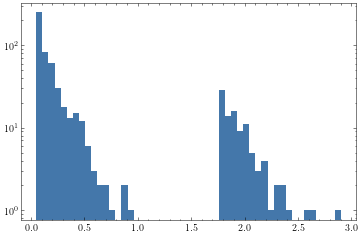

In [55]:
hist(pool[:600], bins=50)
yscale('log')

# P(tumble_time) for diff phi and diff. Gmode

In [132]:
save = True
save = False
alpha = '10'
alpha2 = '7e-2'
Gmode = 'sigmoid'
#Gmode = 'exp'
rt = '1e2'
t_re = '5e-2'
phimax = '0.70'
#phimax = '0.9069'
dt = 1e-4
re_pattern = '(?<=phi).*(?=-t_re)'
flist = glob.glob(log_tfname.format(phi='*', rt=rt, Gmode=Gmode, t_re=t_re, alpha=alpha, phimax=phimax+'*id1l*'))
flist.sort(key = lambda x: float(re.findall(re_pattern, x)[0]))
fig = plt.figure()
bins = 50
for i, f0 in enumerate(flist[:]):
    phi = re.findall(re_pattern, f0)[0]
    for Gmode in ['sigmoid', 'linear', 'norm']:
        if Gmode=='sigmoid':
            label = r'$\phi_o = %s$'%phi + r', G: {}, '.format(Gmode)+r'$\alpha=%s$'%alpha
            flist2 = glob.glob(log_tfname.format(phi=phi, rt=rt, Gmode=Gmode, t_re=t_re, alpha=alpha, phimax=phimax))
        elif Gmode=='norm':
            alpha=alpha2
            label = r'$\phi_o = %s$'%phi + r', G: {}, '.format(Gmode)+r'$\alpha=%s$'%alpha2           
            flist2 = glob.glob(log_tfname.format(phi=phi, rt=rt, Gmode=Gmode, t_re=t_re, alpha=alpha, phimax=phimax))
        elif Gmode=='linear':
            label = '$\phi_o = %s$'%phi + r', G: linear'
             flist2 = glob.glob(log_tfname.format(phi=phi, rt=rt, Gmode=Gmode, t_re=t_re, alpha=alpha, phimax=phimax))

        # diff sims
        pool = []
        print(len(flist2))
        #print(flist2)
        for f1 in flist2[:]:
            tdf = pd.read_csv(f1, delim_whitespace=True, index_col=0)*dt
            dtdf = tdf.diff(axis=0).loc[2:]
            pool = pool + (dtdf.values[~np.isnan(dtdf.values)].tolist())
            #print(len(pool))
        # histogram
        pool = np.array(pool)
        y, b = np.histogram(pool, bins=bins, density=True)
        bc = 0.5*(b[1:]+b[:-1])
        if Gmode=='sigmoid':
            yy = y
            bcc = bc
        plot(bc, y, 'o'*(Gmode=='sigmoid')+'s'*(Gmode=='linear'), label=label)#, color='C%d'%i)
    #hist(pool, bins=bins, density=True, label=label, alpha=0.8)
legend(loc='best')
#xscale('log')
yscale('log')
xlabel('$\Delta t_{\mathrm{re}}$')
ylabel('PDF')
title('Pe=1e2, $t_\mathrm{re}=%s$'%'{:.1e}'.format(num2tex(float(t_re))) + ', $\phi_{\mathrm{max}} = %s$'%phimax)
if save:
    fname = 'plots/hist-dt_re-Pe1e2-t_re{t_re}-alpha{alpha}-phimax{phimax}-diff-phi-diff-Gmode'.format(t_re=t_re, Gmode=Gmode, alpha=alpha, phimax=phimax)
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

IndentationError: unexpected indent (4049153367.py, line 29)

In [ ]:
%matplotlib

In [82]:
%qtconsole

In [157]:
dfp = df0.diff(axis=0).loc[2:]

In [158]:
dfp.min()

p0     0.05
p1     0.05
p2     0.05
p3     0.05
p4     0.05
       ... 
p95    0.05
p96    0.05
p97    0.05
p98    0.05
p99    0.05
Length: 100, dtype: float64

In [ ]:
def exp_phi(self, x):
    Pphi = np.exp(self.alpha*x)*self.C
    return Pphi


## Distribution of local phi

In [5]:
import gsd, gsd.hoomd

In [5]:
phi = '0.4'
fname_glob = '/omid/ehsan/active-rods-sims/gsds/dump-log-tumble_times-phi{phi}-t_re5e-2-rt1e2-alpha10-Gsigmoid-phimax0.9069-id*.gsd'.format(phi=phi)
flist = glob.glob(fname_glob)
flist = [f for f in flist if not('obstacle' in f)]
re_pattern = '(?<=id)\d*(?=.gsd)'
flist.sort(key=lambda x : int(re.findall(re_pattern, x)[0]))

In [100]:
save = True
save = False
fig = figure(figsize=(6,5))

for i, phi in enumerate(['0.4', '0.5', '0.6', '0.7'][:-1]):
    fname_glob = '/omid/ehsan/active-rods-sims/gsds/dump-log-tumble_times-phi{phi}-t_re5e-2-rt1e2-alpha10-Gsigmoid-phimax0.9069-id*.gsd'.format(phi=phi)
    flist = glob.glob(fname_glob)
    flist = [f for f in flist if not('obstacle' in f)]
    re_pattern = '(?<=id)\d*(?=.gsd)'
    flist.sort(key=lambda x : int(re.findall(re_pattern, x)[0]))
    sample = []
    N = 100
    for f0 in flist[:]:
        traj0 = gsd.hoomd.open(f0, 'rb')
        for snapid in np.arange(1000, len(traj0), 200):
            snap0 = traj0[int(snapid)]
            sample = sample + snap0.particles.charge[N:2*N].tolist()
    sample = np.array(sample)
    #sample = sample[sample>0]
    ax = subplot(2,2,i+1)
    ax.hist(sample, bins=100, density=True, color='C%d'%i, label='$\phi_o=%s$'%phi)
    ax.legend(loc='upper right')
    ax.set_xlabel(r'$\phi_{\mathrm{local}}$')
    #ax.set_xlim(0, 0.78)
    if i==0:
        ax.set_ylabel('PDF')
fig.suptitle(r'$N_o=500$, $r_l=2.5$')
tight_layout()
if save:
    fname = 'plots/hist-localphi-diffphi-rl2.5'
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

In [101]:
%qtconsole

(array([3.5108984 , 1.83177308, 1.0685343 , 1.67912532, 0.91588654,
        1.83177308, 1.37382981, 1.52647756, 1.52647756, 1.37382981,
        0.45794327, 1.0685343 , 1.52647756, 1.0685343 , 1.0685343 ,
        0.76323878, 0.91588654, 0.91588654, 1.37382981, 1.0685343 ,
        1.52647756, 1.22118205, 0.61059103, 1.83177308, 1.22118205,
        1.22118205, 1.37382981, 0.76323878, 1.0685343 , 1.22118205,
        1.37382981, 0.76323878, 1.52647756, 1.0685343 , 2.90030737,
        4.57943269, 5.64796699, 5.49531923, 7.17444455, 7.32709231,
        7.78503558, 5.19002372, 5.03737596, 6.25855802, 5.80061475,
        4.88472821, 2.59501186, 1.98442083, 1.98442083, 1.0685343 ,
        1.37382981, 1.37382981, 1.52647756, 0.91588654, 1.22118205,
        0.45794327, 0.45794327, 0.76323878, 0.30529551, 0.61059103,
        0.91588654, 0.61059103, 0.30529551, 0.30529551, 0.30529551,
        0.45794327, 0.91588654, 0.15264776, 0.30529551, 0.30529551,
        0.        , 0.30529551, 0.30529551, 0.30

In [16]:
phi='0.6'
fig = figure()
sample = []
N = 100
f0 = '/omid/ehsan/active-rods-sims/gsds/dump-log-tumble_times-Na100-No500-phi0.6-t_re5e-2-rt1e3-alpha1e-1-Gnorm-phimax0.91-phi00.65-BG0.0-obsgap0.0-obs_distuniform-obs_dist_sigma0.0-id801.gsd'
traj0 = gsd.hoomd.open(f0, 'rb')
for snapid in np.arange(1000, len(traj0), 200):
    snap0 = traj0[int(snapid)]
    sample = sample + snap0.particles.charge[N:2*N].tolist()
sample = np.array(sample)
#sample = sample[sample>0]
ax = subplot(1,1,1)
ax.hist(sample[sample>0], bins=100, density=True, color='C%d'%1, label='$\phi_o=%s$'%phi)
ax.legend(loc='upper right')
ax.set_xlabel(r'$\phi_{\mathrm{local}}$')
#ax.set_xlim(0, 0.78)
ax.set_ylabel('PDF')
fig.suptitle(r'$N_o=500$, $r_l=2.5$')


Text(0.5, 0.98, '$N_o=500$, $r_l=2.5$')

## Hist of localization lengths

In [ ]:
fnames = {
    '5e-2': 
    '/omid/ehsan/active-rods-sims/gwdg/msds/msd-allsims-pp-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.hdf',
    '5':
    '/omid/ehsan/active-rods-sims/gwdg/msds/msd-allsims-pp-2D-Na100-No500-Ro5-phi0.4-T1e-2-dt1e-4-Pe1e2-t_re5e-3-tgsd1e-2-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.001-TMrandom.hdf'
}
fnames = {
    '5': 
    '/omid/ehsan/active-rods-sims/msds/msd-allsims-pp-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.hdf',
    '500':
    '/omid/ehsan/active-rods-sims/msds/msd-allsims-pp-v4-2D-Na100-No2500-Ro5-phi0.4-T0-dt1e-2-t_re5e-1-tgsd2e1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.001-TMrandom.hdf'
}

In [ ]:
stores = dict()
for k, v in fnames.items():
    print(k, v)
    stores[k] = h5py.File(v)

5 /omid/ehsan/active-rods-sims/msds/msd-allsims-pp-v4-2D-Na100-No2500-Ro5-phi0.6-T0-dt1e-2-t_re5e-1-tgsd2e1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.hdf


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/omid/ehsan/active-rods-sims/msds/msd-allsims-pp-v4-2D-Na100-No2500-Ro5-phi0.6-T0-dt1e-2-t_re5e-1-tgsd2e1-Gsigmoid-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom.hdf', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [108]:
%qtconsole

In [45]:
t1 = 1e4
t2 = 2e4
pools = dict()
for k0, s in stores.items():
    pools[k0] = np.array([])
    for k in s.keys():
        df0 = pd.read_hdf(fnames[k0], './%s'%k)
        del df0['MSD']
        pools[k0] = np.append(pools[k0], np.nanmean(df0.loc[t1:t2].values, axis=0))

    #pools[k0] = np.power(pools[k0], 0.5)
    pools[k0] = pools[k0]**0.5

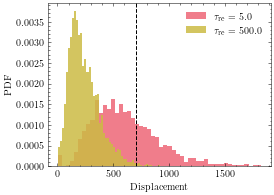

In [51]:
save = True
#save = False
fig = figure(figsize=(4,3))
bins = 50
alpha=0.85
hist(pools['5'], bins=bins, density=True, alpha=alpha, color='C1', label='$\\tau_{\mathrm{{re}}} = %s$'%'5.0',histtype='stepfilled')
hist(pools['500'], bins=bins, density=True, alpha=alpha, color='C3', label='$\\tau_{\mathrm{{re}}} = %s$'%'500.0', histtype='stepfilled')
axvline(x=700.624, ls='--', color='black')
xlabel('Displacement')
ylabel('PDF')
legend(loc='best')
if save:
    fname = 'plots/4paper/hist-disp-phi0_4-diff-tre-t1e4-2e4-tgsd2e1'
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')
    fname = fname.replace('4paper/', '')
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')

In [85]:
%matplotlib inline

In [104]:
pool1.mean()

195.9649324119226

In [20]:
pools['5e-2'].mean()

465.01719432508503

In [34]:
df0

0           1            2            3          4  \
time                                                                  
0             0.00       0.000        0.000        0.000       0.00   
20          381.60     308.388      318.242      372.541     386.60   
40         1547.18     979.685      664.642     1443.200    1357.20   
60         2195.63    2328.860      664.644     1880.720    2809.55   
80         2195.63    4366.630      664.644     1882.530    4160.11   
...            ...         ...          ...          ...        ...   
499820  1105130.00  748904.000  3371900.000  1991430.000  742758.00   
499840  1105130.00  748904.000  3371900.000  1991430.000  742758.00   
499860  1105130.00  748905.000  3371900.000  1991430.000  742758.00   
499880  1105130.00  748905.000  3371900.000  1991430.000  742758.00   
499900  1105130.00  748905.000  3371900.000  1991430.000  742758.00   

                 5              6            7            8            9  ...  \
time                                                                      ...   
0            0.000       0.000000        0.000        0.000        0.000  ...   
20         365.597       0.000009      335.853      392.034      136.743  ...   
40        1403.460       0.000009      360.108     1335.640      136.750  ...   
60        3214.250       0.000009      360.108     2641.330      136.750  ...   
80        4536.300       0.000009      360.108     4314.750      136.750  ...   
...            ...            ...          ...          ...          ...  ...   
499820  592878.000  275627.000000  4771280.000  4738450.000  5137990.000  ...   
499840  592862.000  275627.000000  4771280.000  4695830.000  5137990.000  ...   
499860  592882.000  275627.000000  4771280.000  4655160.000  5137990.000  ...   
499880  592882.000  275627.000000  4771280.000  4654830.000  5137990.000  ...   
499900  592882.000  275627.000000  4771280.000  4654080.000  5137990.000  ...   

                 90           91           92          93           94  \
time                                                                     
0          0.000000        0.000        0.000       0.000        0.000   
20         0.000282      392.711      349.236     377.381      392.036   
40         0.000282     1146.360     1073.680    1490.310     1389.100   
60         0.000282     2206.710     2332.440    3352.170     3024.730   
80         0.000282     4052.350     3772.920    5136.460     5146.280   
...             ...          ...          ...         ...          ...   
499820  9952.420000  1316390.000  3455200.000  570520.000  3107000.000   
499840  9949.810000  1316410.000  3455250.000  570520.000  3107000.000   
499860  9948.270000  1316410.000  3455250.000  570520.000  3107000.000   
499880  9948.230000  1316410.000  3455250.000  570520.000  3107000.000   
499900  9947.850000  1316410.000  3455250.000  570520.000  3106100.000   

                95           96          97          98          99  
time                                                                 
0            0.000        0.000       0.000       0.000       0.000  
20         145.237      352.355     349.114     324.944     392.038  
40         145.241     1138.130    1476.650    1378.340    1525.530  
60         145.464     1138.120    3307.790    3030.170    2467.390  
80         145.294     1138.120    5973.830    5592.290    1921.750  
...            ...          ...         ...         ...         ...  
499820  584427.000  6204670.000  227515.000  970838.000  679614.000  
499840  584427.000  6204670.000  227515.000  970838.000  679614.000  
499860  584427.000  6204670.000  227515.000  970588.000  679614.000  
499880  584427.000  6204670.000  227515.000  970588.000  679614.000  
499900  584427.000  6204670.000  227515.000  970588.000  679614.000  

[24996 rows x 100 columns]